<h1><center><font size="5">Aplicaciones del muestreo directo y cadenas de Markov: Cálculo de integrales y dinámica poblacional</font></center></h1>
<h1><center><font size="4">Victor M. Oviedo</font></center></h1>
<h1><center><font size="4">Instituto de Física, Universidad de Antioquia, Calle 70 No. 52-21, Medellín, Colombia</font></center></h1>

**Resumen:** <div style="text-align: justify"> En este trabajo se estima el valor de $\pi$ mediante integración usando métodos de Monte Carlo usando dos algoritmos, el primero que usa muestreo directo y el segundo que usa cadenas de Markov. Se encuentra que el muestreo directo estima el valor teórico con un error menor al 0.1% y se encuentra un valor óptimo para el parámetro $\delta$ en el algoritmo con cadenas de Markov. Adicionalmente se aplican las cadenas de Markov para el estudio de dinámica poblacional, encontrándose que las poblaciones tienden a extinguirse si la tasa de mortandad es mayor que la de nacimiento y tienden al valor límite de la población en el caso contrario. Para igualdad en los dos parámetros anteriores se encuentra que tienden aleatoriamente a extinguirse o llegar al valor límite para tiempos grandes pero no a quedarse en un valor intermedio. </div>

**Palabras claves:** Cadenas de Markov, Monte Carlo, números pseudoaleatorios, desviación r.m.s., pi, dinámica de poblaciones.

<h1><center><font size="4">1. Introducción</font></center></h1>
<div style="text-align: justify"> 
El método de Montecarlo consiste en aproximar expresiones matemáticas[1] usando números aleatorios (o pseudoaleatorios computacionalmente hablando). Su nombre tiene origen en el Casino de Monte Carlo en Monaco, el cuál se conoce como la capital del azar y fue nombrado por ser la ruleta una generadora de números aleatorias. Este método fue desarrollado en el Proyecto los Álamos, que tenía como objetivo construir una bomba atómica por parte de los Estados Unidos, nombres como John von Neumann, Nicholas Metropolis, Stanislaw Ulam, Enrico Fermi, entre otros, contribuyeron al desarrollo de este método. </div>
<div style="text-align: justify">
En el presente trabajo se busca calcular la integral que se muestra en la ecuación (1) usando números pseudoaleatorios mediante el método de Monte Carlo, para ello se usarán dos formas de aproximarse a la solución exacta, la primera es el método de muestreo directo y posteriormente se buscarán aproximaciones con cadenas de Markov. </div>
$$ I = 4 \int_0^1 \sqrt{1-x^2}dx \tag{1} $$

<div style="text-align: justify"> 
Además del empleo de cadenas de Markov para estimar integrales, existen diversas aplicaciones en las que se involucran procesos estocásticos, por ejemplo, en meteorología se pueden plantear modelos probabilísticos para saber si un día va a ser lluvioso o seco[2]. Otra aplicación está en biología, donde se usan cadenas de Markov de tiempo continuo para modelar la evolución del ADN, modelos como JC69, K80, GTR, entre otros son algunos de los usados, la principal diferencia entre los diferentes modelos está en los parámetros que se usan para describir la razón a la cual se remplaza un nucleótido por otro en el proceso evolutivo[3].</div>
<div style="text-align: justify"> 
En este caso se estudiará la dinámica poblacional de un número de individuos donde el tiempo toma un valor discreto, analizado el comportamiento para una única población se procederá a generalizar el problema para 100 poblaciones en función del número de pasos de tiempo y los parámetros del modelo.</div>




<h1><center><font size="4">2. Marco teórico</font></center></h1>

**2.1. Solución exacta de la integral:**

La integral que se busca resolver, ec.(1), tiene solución exacta, para solucionarla se puede hacer el cambio de variable:
$$x=sin\alpha \tag{2} $$
$$dx = cos\alpha d\alpha \tag{3} $$
y usando la identidad trigonométrica:
$$sin^2\alpha + cos^2\alpha =1 $$
$$cos\alpha = \sqrt{1 - sin^2\alpha} = \sqrt{1 - x^2} \tag{4} $$
reemplazando (3) y (4) en (1) y cambiando los respectivos límites de integración se obtiene:
$$I = 4\int_0 ^{\pi/2} cos^2\alpha d\alpha \tag{5} $$
y con la identidad trigonométrica:
$$cos^2\alpha = \frac{1-cos(2\alpha)}{2} \tag{6} $$
se obtiene:
$$I = 4\int_0 ^{\pi/2} \frac{1-cos(2\alpha)}{2} d\alpha = \pi \tag{7} $$
ya que,
$$I = \int_0 ^{\pi/2} cos(2\alpha) d\alpha = 0 \tag{8} $$
El resultado de (7) se tomará como el valor teórico para comparar los resultados obtenidos, el valor que da Python para $\pi$ es
$$\pi = 3.14159265359$$

**2.2. Integrales mediante muestreo directo:** 
<div style="text-align: justify"> 
Para entender la integración por este método de Monte Carlo conviene interpretar a la integral como el área bajo la curva. Este método consiste en generar números pseudoaleatorios dentro de un dominio que represente un área conocida, por ejemplo un cuadrado, que encierre nuestra área a calcular. Llamaremos éxitos a los números pseudoaleatorios que se encuentren por debajo del área a calcular, pues son estos los que contribuirán al estimado de la integral en cuestión, y fallos a los que estén por encima. Luego de haber generado $N$ números aleatorios, el número de éxitos estará representado por $n hits$ y la razón $\frac{n hits}{N}$ nos dará un estimado del valor de la integral. Si el número de ensayos $N$ tiende a infinito el valor estimado de la integral tiende al valor exacto[4]. </div>
<div style="text-align: justify"> 
Para este caso en particular se pueden generarán parejas de números aleatorios $(x,y)$ y el criterio para seleccionar los $n hits$ es que estas coordenadas estén por dentro del círculo que representa a la integral. Se puede aprovechar la simetría de la integral a calcular y solo es necesario generar números pseudo sobre un cuarto del cuadrado que circunscribe al círculo, esto explica el prefactor $4$ que acompaña a la integral en la ecuación (1). </div>

**2.3. Cadenas de Markov:** 
<div style="text-align: justify"> 
Una cadena de Markov es una secuencia de eventos en donde la probabilidad de ocurrencia del evento siguiente depende únicamente del estado actual y no de los anteriores, esta caracterista se conoce como falta de memoria. Las cadenas de Markov pueden ser tanto discretas como continuas en el tiempo[5]. </div>
<div style="text-align: justify"> 
Su aplicación al cálculo de integrales funciona de manera análoga como se describió para las integrales mediante muestreo directo en el sentido que $n hits$ representa el número de puntos pseudoaleatorios que están por debajo de la curva a integrar. La diferencia es que en este método se parte de una posición inicial $(x,y)$ y se genera un par de números pseudoaleatorios $(\Delta_x,\Delta_y)$ que indican como cambian las coordenadas inciales. Sobre las coordenadas $(x + \Delta_x,y + \Delta_y)$ se imponen dos condiciones, la primera determina si el nuevo punto está dentro del cuadrado que circunscribe al círculo y la segunda si está dentro del círculo, es decir que solo aquellos puntos que cumplan las dos condiciones suman al valor $n hits$. Los puntos que cumplan la primera condición son los puntos de partida para la siguiente generación de números pseudoaleatorios. Si no se cumplen ninguna de las dos condiciones se pasa a la siguiente generación con el par de coordenadas $(x,y)$ sin modificar.</div> 
<div style="text-align: justify"> 
Este método, además del número de ensayos $N$, contiene un parámetro positivo adicional, que representaremos por $\delta$ e indica el intervalo $(-\delta,\delta)$ de donde se generarán los números pseudoaleatorios para realizar un cambio en las coordenadas.</div>
<div style="text-align: justify">
En el estudio de dinámica poblacional que se realizará se generan números pseudo para determinar si el número de individos en el paso siguiente aumenta o disminuye, además se introducen los parámetros $a$ y $b$ cuyo significado es tasa de nacimiento y tasa de mortandad respectivamente. Por la definición de cadena de Markov, los criterios para definir una muerte o un nacimiento del siguiente paso deben ser proporcionales al número de individuos en el estado actual.</div> 

**2.3.1. 1/2 thumb rule:** 
<div style="text-align: justify"> Esta regla habla sobre el parámetro $\delta$ y dice que para valores pequeños de $\delta$, es decir cercanos a 0, el número de $n hits$ será alto, mientras que para $\delta$ grande, es decir mucho mayores a 1, las contribuciones a $n hits$ serán pocas ya que muchas no cumplirán las dos condiciones expuestas anteriormente, por lo que se propone un valor óptimo para $\delta$ tal que los $n hits$ sean del orden de 1/2 de los intentos[4]. </div> 

**2.4. Generadores pseudoaleatorios:** 
<div style="text-align: justify"> 
Computacionalmente hablando se habla de números pseudoaleatorios y no de números aleatorios porque para generar estos números se usa un algoritmo determinista[6]. La librería Numpy para Python permite generar números pseudoaleatorios[7] en diferentes dominios o que sigan determinada distribución.</div> 

En este trabajo se usarán los métodos **random.uniform()** el cual genera números pseudo, por defecto entre [0.0,1.0), a partir de una distribución uniforme y **random.rand()** permite crear un conjunto de números pseudo entre [0.0,1.0) (por defecto) con dimensiones definidas, es decir, permite generar una arreglo cuyas entradas pueden ser arreglos de dimensiones no necesarimente iguales.

**2.5. Desviación r.m.s.:** 
<div style="text-align: justify"> 
También conocida como desviación estándar,es una medida cuantitativa que nos habla de la dispersión de un conjunto de datos, para conjuntos discretos de datos está definida como[8]:
$$ \sigma_X = \sqrt{\sum_{i=1}^{N}(x_{i} - \bar{x})^2 f_X(x_i)} \tag{9} $$
donde $N$ es el número de datos, $\bar{x}$ es el valor promedio y $f_X(x)$ es la función de distribución de probabilidad que siguen los datos. Para el caso que se quiere analizar $f_X(x)=\frac{1}{N}$, pues los números pseudo se generarán bajo una distribución uniforme. El valor de referencia respecto al cuál se quiere calcular la dispersión es el valor teórico de $\pi$, por lo que se puede reescribir la ecuación (9) para el caso de interés como:
$$ \sigma = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(\pi_{est-i} - \pi)^2} \tag{10} $$
</div> 
donde $\pi_{est-i}$ representa el valor estimado para $\pi$ usando el método de Monte Carlo.

**2.6. Distribución Gaussiana:**
<div style="text-align: justify"> 
La distribución Gaussiana[8], también conocida como distribución normal, es una distribución continua definida como:
</div> 
$$ g_X(x) = \frac{1}{\sqrt{2\pi\sigma}}exp(\frac{-(x-\mu)^2}{2\sigma^2}) , -\infty<x<\infty\tag{11} $$
es una distribución simétrica alrededor del valor medio $\mu$ y con desviación estándar $\sigma$. Su importancia radica en la gran cantidad de fenómenos que se pueden modelar mediante esta distribución y representa el caso límite continuo de la distribución binomial.

<h1><center><font size="4">3. Resultados y discusión</font></center></h1>

**3.1. Método de muestreo directo:**
<div style="text-align: justify"> 
El algoritmo 1 muestra el algoritmo base del cual se parte y el algoritmo 2 muetra las modificaciones que se le hacen al primero para calcular el valor r.m.s. para cada valor de $n trials$, variando este último parámetro entre $2^4$ y $2^{12}$ en pasos de 1 en la potencia. </div> 

In [38]:
import random, math, pylab
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm

**Algoritmo 1.** Algoritmo base para hacer las variaciones necesarias.

def direct_pi(N):

    n_hits = 0
    for i in range(N):
        x,y = random.uniform(-1.0,1.0), random.uniform(-1.0,1.0)
        if x^2 + y^2 > 1.0:
            n_hits += 1
    return n_hits
n_runs = 500

n_trials = 4000

for run in range(n_runs):

    print 4.0 * direct_pi(n_trials) / float(n_trials)

**Algoritmo 2.** Algoritmo modificado para calcular valor r.m.s., variar $n trials$ y graficar histograma

In [63]:
pi = np.pi #lo tomaremos como el valor teórico

def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x,y = random.uniform(-1.0,1.0), random.uniform(-1.0,1.0)
        if x**2 + y**2 < 1.0:
            n_hits +=1
    return n_hits

def sup(x): #funcion que se pide superponer
    return 1.644/np.sqrt(x)

n_runs = 500
N_TRIALS = [] #para graficar n_triañs
RMS = [] #para graficar r.m.s
SUP = [] #para la funcion superpuesta
PI_EST = [] #para los valores estimados de pi
k = 4 # para un n_trial inicial de 2^4

while(k<=12):
    suma = 0 #suma de los cuadrados, para calcular rms 
    n_trials = pow(2,k) #definimos n_trials como 2^k y variamos k
    N_TRIALS.append(n_trials)
    SUP.append(sup(n_trials))
    for run in range(n_runs):
        pi_est = 4.0*direct_pi(n_trials) / float(n_trials)
        suma = suma + (pi_est - pi)**2 #hacemos esta suma para calcular el valor r.m.s.
        if(k==12): #para n_trials = 2^12 se guardaran los valores pi_est para realizar el histograma
            PI_EST.append(pi_est)
    rms = np.sqrt(suma/n_runs) 
    RMS.append(rms)
    k +=1 #variamos k para el siguiente ciclo

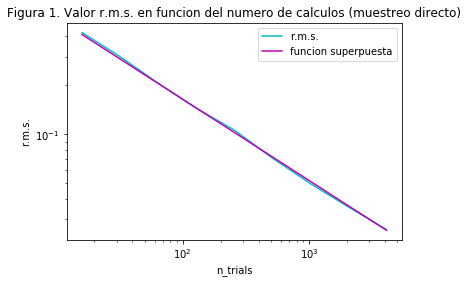

In [29]:
plt.title("Figura 1. Valor r.m.s. en funcion del numero de calculos (muestreo directo)")
plt.xlabel("n_trials")
plt.ylabel("r.m.s.")
plt.loglog(N_TRIALS,RMS,label='r.m.s.',color='c')
plt.loglog(N_TRIALS,SUP,label='funcion superpuesta',color='m')
plt.legend()
plt.show()

La figura 1 muestra los valores obtenidos para la desviación rms en función de $n trials$ en escala logarítmica, se puede apreciar que la función que se definió como sup, se ajusta bien a los datos, por lo que esta función, que se define en la ecuación (12) representa los datos obtenidos.

$$ \sup = \frac{1.644}{\sqrt{ntrials}} \tag{12} $$

La figura 2 muestra un histograma obtenido en el ciclo while del algoritmo 2, se eligió graficar con $ntrials=2^{12}$ porque era el que más valores tenía y podía dar un mejor comportamiento.

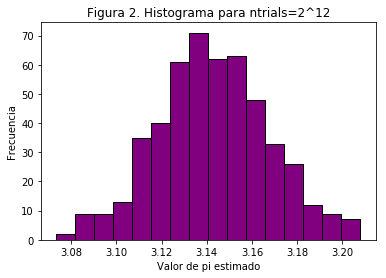

('El valor medio obtenido para pi es: ', '3.1426', '+/-', '0.0251')
Y el error relativo respecto al valor teorico es 0.031


In [83]:
(mu, sigma) = norm.fit(PI_EST)
plt.hist(PI_EST, bins='auto',facecolor='purple',edgecolor='black')
plt.title("Figura 2. Histograma para ntrials=2^12")
plt.xlabel('Valor de pi estimado')
plt.ylabel('Frecuencia')
plt.show()
print("El valor medio obtenido para pi es: ","{:.4f}".format(mu),'+/-',"{:.4f}".format(sigma))
er = 100*abs(pi-mu)/pi
print('Y el error relativo respecto al valor teorico es '"{:.3f}".format(er))

**3.2 Muestreo usando cadenas de Markov**
El algoritmo 3 muestra el algoritmo base para estimar el valor de $\pi$ usando cadenas de Markov, a partir de este algoritmo se construirá otro para calcular el valor rms en función del parámetro $\delta$.

**Algoritmo 3.** Algoritmo base para estimar el valor de pi mediante cadenas de Markov.

def markov_pi(N,delta):

    x,y = 1.0, 1.0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta,delta), random.uniform(-delta,delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_hits += 1
    return n_hits
    
n_runs = 1000

n_trials = 4000

delta = 0.1

for run in range(n_runs):

    print 4.0 * markov_pi(n_trials,delta) / float(n_trials)

<div style="text-align: justify"> 
Una primera diferencia entre los algoritmos 1 y 3 es que el algoritmo que describe el cálculo mediante cadenas de Markov necesita una posición inicial, que se ha definido como (1.0,1.0), mientras que el método de muestre directo no necesita esto. Además, cada ciclo del algoritmo 1 no depende del valor obtenido en el ciclo anterior, mientras que el algoritmo 3 depende del valor obtenido en el ciclo inmediatamente anterior, lo que es de esperarse porque está basado en cadenas de Markov. </div> 
<div style="text-align: justify"> 
Otra diferencia está en que los números pseudo generados para el algoritmo 1 van directamente a la condición de si están dentro o fuera del círculo, mientras que los generados en el algoritmo 3 definen un cambio en las posiciones actuales y es el valor absoluto de la diferencia entre las posiciones iniciales y el cambio lo que entra en los condicionales.</div> 
<div style="text-align: justify"> 
La figura 3. muestra el valor rms en función de $\delta$ para la estimación de $\pi$ en escala logarítmica mediante cadenas de Markov, esta gráfica se obtiene a partir del algoritmo 4, que es el algoritmo 3 bajo las modificaciones necesarias. De esta gráfica y tomando la interpretación del valor rms como una medida de la dispersión, se puede apreciar que el valor de $\delta$ que tiene menos dispersión es $\delta = 0.5$. También se puede apreciar que a valores más pequeños de delta o más grandes la dispersión aumenta, esto se puede explicar mediante la regla 1/2 thumb rule, la cual dice que que para valores muy pequeños de $\delta$ el cambio en las posiciones será pequeño y el valor a aproximar será sobre estimado, mientras que para valores muy grandes los cambios en las coordenadas $(x,y)$ serán muy grandes y muchos de los intentos no cumplirán la condición para aportar al valor de la integral.</div> 

<div style="text-align: justify">
Los valores rms obtenidos para el método de cadenas de Markov son mayores que los obtenidos para el muestreo directo, esto se puede deber a la condición adicional que tiene el método por cadenas de Markov y la dependencia extra en un el parámetro $\delta$. Nótese además que en el método de muestreo directo todos los números generados están dentro del cuadrado que circunscribe al círculo, mientras que en el método por cadenas de Markov existe una probabilidad de que los números se salgan de este cuadrado.</div> 

**Algoritmo 4**  Algoritmo 3 modificado para variar el valor de $\delta$ y calcular el valor rms.

In [86]:
def markov_pi(N,delta): #la funcion dada no se modifica
    x,y = 1.0, 1.0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta,delta), random.uniform(-delta,delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_hits += 1
    return n_hits


n_runsb = 1000 #se le agrega b al nombre para diferenciarlo del problema anterior
n_trialsb = 4000
delta = 0.0625 #para el delta inicial
DELTA = [] #para guardar los valores de delta
RMSb = [] #para graficar rms en el numeral b


while(delta<=4.0):
    suma = 0 #suma de los cuadrados, para calcular rms
    DELTA.append(delta)
    for run in range(n_runsb):
        pi_estb = 4.0 * markov_pi(n_trialsb,delta)/ float(n_trialsb)
        suma = suma + (pi_estb - pi)**2 #para rms
    rmsb = np.sqrt(suma/n_runsb)
    RMSb.append(rmsb)
    delta = delta*2 #se actualiza el valor de delta para el siguiente ciclo

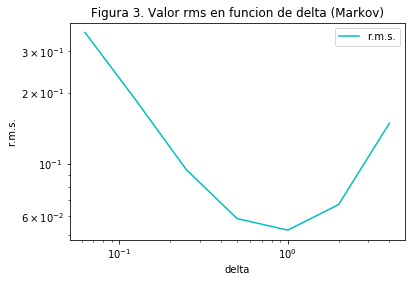

In [91]:
plt.title("Figura 3. Valor rms en funcion de delta (Markov)")
plt.xlabel("delta")
plt.ylabel("r.m.s.")
plt.loglog(DELTA,RMSb,label='r.m.s.',color='c')
plt.legend()
plt.show()

**3.3) Dinámica de poblaciones**
<div style="text-align: justify"> 
El algoritmo 5 muestra una función para estudiar la dinámica poblacional mediante cadenas de Markov. La función random.rand() usada en este algoritmo permite generar un arreglo de números pseudo cuyas entradas pueden ser a su vez arreglos, los cuales no necesariamente tienen que tener la misma dimensión, como se encuentra escrito, generará un único número aleatorio, pues está escrito en su manera por defecto, es decir sin nada entre el paréntesis. La anterior es la principal diferencia respecto al generador random.uniform(). 
</div> 
<div style="text-align: justify"> 
La condición $a*x[t]$, es decir, el producto entre la tasa de nacimiento $a$ y el estado actual de la población representa la probabilidad con la que nacerán los individuos en el siguiente paso, análogamente, $b*x[t]$ representa la probabilidad de mortandad en el siguiente paso, siendo $b$ la tasa de mortandad. </div> 

**Algoritmo 5** Función para estudiar la dinámica poblacional usando cadenas de Markov.

In [93]:
N = 100 #maximum population size
a = .5/N #birth rate
b = .5/N #death rate
nsteps = 1000 #time

def pob(N,a,b,nsteps): #pob = poblaciones
    x = np.zeros(nsteps) #para los 3 valores de N
    x[0] = 25

    for t in range(nsteps-1):
        if 0 < x[t] < N-1:
            #Is there a birth?
            birth = np.random.rand() <= a*x[t]
            #Is there a death?
            death = np.random.rand() <= b*x[t]
            #We update the population size
            x[t+1] = x[t] + 1*birth -1*death
        #The evolution stops if we reach 0 or N
        else:
            x[t+1] = x[t]
    return x


T = [] #para graficar el tiempo
for i in range(nsteps):
    T.append(i)

<div style="text-align: justify">
Las figuras 4,5 y 6 muestran las simulaciones del algoritmo 5 para diferentes valores de los parámetros $a,b$ y valores ligeramente distintos para el tamaño máximo de la población $N$. En la figura 4 se muestra la simulación bajo la condición $a=b$, es decir la tasa de muertes y nacimiento son iguales. De estas simulaciones se puede observar que los valores finales de la población pasados 1000 pasos de tiempo no se aleja tanto del valor inciales de la población $x[0]=25$, para ninguno de los tres casos. </div> 
<div style="text-align: justify">
Bajo la condición $a>b$, con parámetros $a=0.8/N$ y $b=0.2/N$ se puede apreciar que la población llega a su valor máximo, donde el algoritmo deja de generar cambios, esto se muestra en la figura 5, esto sucede para los tres valores del tamaño máximo de la población elegidos $N=80,100,120$ y es de esperarse, pues será más probable que individuos nazcan a que mueran y si el número de pasos es lo suficientemente grande se llegará al valor $N$. El caso contrario se muestra en la figura 6, es decir, $a<b$, $b=0.8/N$ y $a=0.2/N$ y siguiendo una interpretación análoga a la dada para la figura 5, se observa que la población se extingue.  </div>

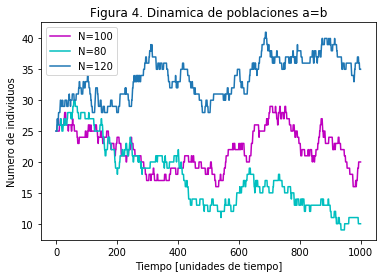

In [100]:
N_2 = pob(100,.5/100,.5/100,nsteps) # para los tres valores de N
N_3 = pob(80,.5/80,.5/80,nsteps)
N_4 = pob(120,.5/120,.5/120,nsteps)
plt.title("Figura 4. Dinamica de poblaciones a=b")
plt.xlabel("Tiempo [unidades de tiempo]")
plt.ylabel("Numero de individuos")
plt.plot(T,N_2,label='N=100',c='m')
plt.plot(T,N_3,label='N=80',c='c')
plt.plot(T,N_4,label='N=120')
plt.legend()
plt.show()

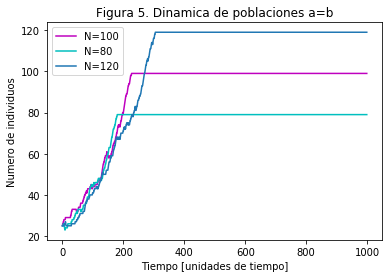

In [101]:
N_2 = pob(100,.8/100,.2/100,nsteps) # para los tres valores de N
N_3 = pob(80,.8/80,.2/80,nsteps)
N_4 = pob(120,.8/120,.2/120,nsteps)
plt.title("Figura 5. Dinamica de poblaciones a=b")
plt.xlabel("Tiempo [unidades de tiempo]")
plt.ylabel("Numero de individuos")
plt.plot(T,N_2,label='N=100',c='m')
plt.plot(T,N_3,label='N=80',c='c')
plt.plot(T,N_4,label='N=120')
plt.legend()
plt.show()

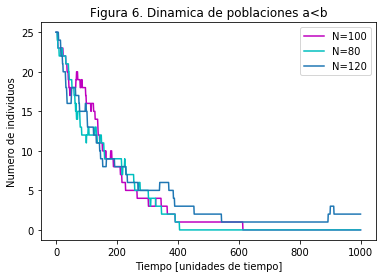

[0.40679909023178157, 0.27970116087567404, 0.1952180505432137, 0.15038636011241005, 0.10540994283450286, 0.0713844473825884, 0.05021213659734864, 0.03591760158198534, 0.025093974286085566]
[0.3597878140452635, 0.18641877008778987, 0.09440046849384079, 0.058647953944985856, 0.052427792025023776, 0.06725073310028548, 0.14841335416333296]


In [122]:
N_2 = pob(100,.2/100,.8/100,nsteps) # para los tres valores de N
N_3 = pob(80,.2/80,.8/80,nsteps)
N_4 = pob(120,.2/120,.8/120,nsteps)
plt.title("Figura 6. Dinamica de poblaciones a<b")
plt.xlabel("Tiempo [unidades de tiempo]")
plt.ylabel("Numero de individuos")
plt.plot(T,N_2,label='N=100',c='m')
plt.plot(T,N_3,label='N=80',c='c')
plt.plot(T,N_4,label='N=120')
plt.legend()
plt.show()

**Vectorización del problema anterior**
<div style="text-align: justify">
El algoritmo 6 es una modificación del algoritmo 5 donde se simulan $ntrials$ poblaciones al mismo tiempo. Se varía separadamente el número de pasos $nsteps$. Las figuras 7,8 y 9 muestran los histogramas obtenidos para $nsteps = 10,1000,10000$ respectivamente. Nótese primero que el número de individuos en cada población es un número pseudoaleatorio entre 0 y 100, a diferencia del algoritmo 5, donde el tamaño de la población tenía un valor fijo $x[0]=25$. 
</div>
<div style="text-align: justify">
Las simulaciones se realizaron con $a=b$ y $N=100. $La figura 7 no muestra variaciones considerables, esto se puede explicar por el número pequeño de pasos, en este caso $nsteps=10$, por lo que la población se modificará a lo sumo $\pm10$ individuos respecto a su valor inicial. Son llamativos los comportamientos mostrados en las figuras 8 y 9, donde se ve que las barras más altas están en los extremos, más notorio en la figura 9. Esto se puede deber a la naturaleza de las cadenas de Markov, en donde la población del paso siguiente depende únicamente de la anterior, como los tamaños iniciales están determinados aleatoriamente, es de esperarse que para una determinada muestra cuya población inicial sea mayor a la mitad, 50 en este caso, desde el primer paso habrá mayor peso en la condición de nacer, pues la probabilidad de nacimiento será proporcional a un número mayor a 50, mientras que la de mortandad a un número menor a 50, por lo que es de esperarse que para $nsteps$ lo suficientemente grandes la población llegue a su tamaño límite. Caso contrario si el tamaño inicial es menor a 50. Por lo que para $nsteps$ grandes es de esperarse que las barras más altas en los histogramas estén en los extremos.
</div>

**Algoritmo 6**  Vectorización del algoritmo 5 para $ntrials=100$ poblaciones.

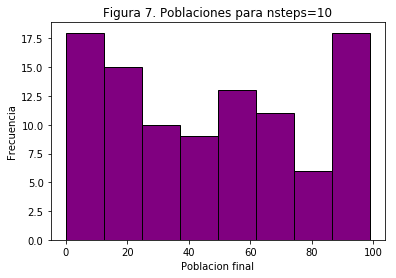

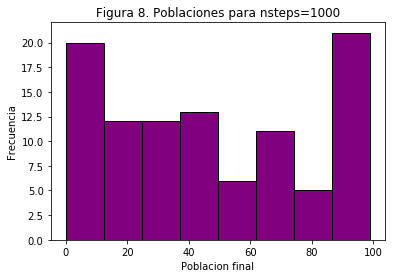

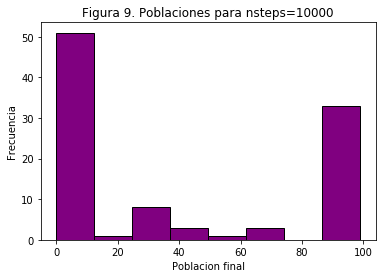

In [121]:
N = 100
ntrials = 100
a = .5/N #birth rate
b = .5/N #death rate

x = np.random.randint(size=ntrials,low=0,high=N)

def simulate(x,nsteps):
    #Run the simulation
    for i in range(nsteps-1):
        #Which trials to update?
        upd = (0 < x) & (x < N-1)
        #In which trials do births occur?
        birth = 1*(np.random.rand(ntrials) <= a*x)
        #In which trials do deaths occur?
        death = 1*(np.random.rand(ntrials) <= b*x)
        #We update the population size for all trials
        x[upd] += birth[upd] - death[upd]
        
nsteps_list = [10, 1000, 10000]


simulate(x,nsteps_list[0])
plt.hist(x,bins='auto',facecolor='purple',edgecolor='black')
plt.title('Figura 7. Poblaciones para nsteps=10')
plt.xlabel('Poblacion final')
plt.ylabel('Frecuencia')
plt.show()

x = np.random.randint(size=ntrials,low=0,high=N)
simulate(x,nsteps_list[1])
plt.hist(x,bins='auto',facecolor='purple',edgecolor='black')
plt.title('Figura 8. Poblaciones para nsteps=1000')
plt.xlabel('Poblacion final')
plt.ylabel('Frecuencia')
plt.show()

x = np.random.randint(size=ntrials,low=0,high=N)
simulate(x,nsteps_list[2])
plt.hist(x,bins='auto',facecolor='purple',edgecolor='black')
plt.title('Figura 9. Poblaciones para nsteps=10000')
plt.xlabel('Poblacion final')
plt.ylabel('Frecuencia')
plt.show()

<h1><center><font size="4">4. Conclusiones</font></center></h1>
<div style="text-align: justify">
La recta, en escala logarítmica $ \sup = \frac{1.644}{\sqrt{ntrials}} $, representa bien el comportamiento de como disminuye la dispersión para el estimado de $\pi$ mediante el método de muestreo directo. Además, dado que la dispersión disminuye cuando se aumenta el número de intentos, se obtiene una buena aproximación para el valor de $\pi$ mediante este método con un error relativo menor al 0.1% respecto a su valor teórico.

Se encuentra un valor óptimo que minimiza la dispersión, en escala logarítmica, para la estimación de $\pi$ usando cadenas de Markov, este valor es $\delta= 0.5$

Hay una mayor probabilidad de que una población se extinga si la tasa de mortandad es mayor que la tasa de nacimiento, así como hay una mayor probabilidad de que llegue a su valor límite si la tasa de nacimiento es mayor que la tasa de mortandad. 

Para valores grandes de $nsteps$ las poblaciones tienden, aleatoriamente, a extinguirse o a llegar a su valor límite pero no tienden a quedarse con un tamaño de población intermedia.
</div>

<h1><center><font size="4">5. Bibliografía</font></center></h1>

[1] https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo

[2] https://rmets.onlinelibrary.wiley.com/doi/abs/10.1002/qj.49708837511

[3] https://en.wikipedia.org/wiki/Models_of_DNA_evolution

[4] Werner Krauth. Statistical Mechanics: Algorithms and Computations. Oxford
Master Series in Statistical, Computational, and Theoretical Physics. (Oxford
University Press, 2006), Chap 1, pp. 4,7.

[5] https://en.wikipedia.org/wiki/Markov_chain

[6] https://es.wikipedia.org/wiki/N%C3%BAmero_pseudoaleatorio

[7] https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html

[8] S.Sirca,Probability for Physicists (Springer, Switzerland,2016) Chap. 3,4, pp. 70,100

<h1><center><font size="4">6. Agradecimientos</font></center></h1>
Al profesor Johans Restrepo Cárdenas, por presentar los conceptos y desarrollos de la física estadística de manera entendible y sencilla sin perder el rigor que estos llevan intrínsecos.  